**Author:** Max Aragón <br>
**Affiliation:** Université Bretagne Sud <br>
**Course:** Machine Learning <br>
**Date:** 2022-11-04

<div class="alert alert-block alert-success">
<h2><center>Machine Learning Assignment</center></h2>

# Content

1. [Introduction](#chapter0)

2. [Data Analysis](#chapter1)

3. [Logistic Regression](#chapter2)

4. [Tree-based models](#chapter3)

5. [Model comparison](#chapter4)


***

# 1. Introduction <a id='chapter0'></a>

***

This Jupyter Notebook compares the performance of Logistic Regression and Random Forest algorithms. The dataset under analysis consists of sonar data. The aim is to distinguish between rocks and metal structures underwater. The data contains 60 columns and 208 rows with numbers in the range of 0.0 to 1.0. Each number represents the backscattering energy of acoustic waves over a certain period of time. The target features associated with each record include *R* if the object is a rock and *M* if it is a mine (metal).

<div class="alert alert-block alert-warning"><b> Warning! To run Notebook successfully, it must be run sequentially (i.e. not skipping cells). </b>  </div>

***

# 2. Data analysis <a id='chapter1'></a>

***
+ A) Preview the 5 first and 5 last rows (<font color='red'>code</font> and <font color='green'>comment</font>)
+ B) Split the data into train and test sets (<font color='red'>code</font>)
+ C) Brief description (<font color='red'>code</font> and <font color='green'>comment</font>)
+ D) Correlation among features(<font color='red'>code</font> and <font color='green'>comment</font>)
+ E) Error function(<font color='green'>comment</font>)
+ F) Normalization (<font color='green'>comment</font>)

## A) Preview <a id='preview'></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sonar = pd.read_csv("sonar_01.csv", header=None); sonar.shape

(208, 61)

In [3]:
sonar.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.2164,0.2544,0.2936,0.2935,0.2657,0.3187,0.2794,0.2534,0.1980,0.1929,...,0.0052,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,M
1,0.1911,0.2475,0.1606,0.0922,0.2398,0.3220,0.4295,0.2652,0.0666,0.1442,...,0.0105,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,R
2,0.1241,0.1533,0.2128,0.2536,0.2686,0.2803,0.1886,0.1485,0.2160,0.2417,...,0.0055,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,M
3,0.0750,0.1631,0.2709,0.3358,0.4091,0.4400,0.5485,0.7213,0.8137,0.9185,...,0.0163,0.0229,0.0369,0.0040,0.0375,0.0455,0.1452,0.2211,0.1188,R
4,0.2085,0.2720,0.2188,0.3037,0.2959,0.2059,0.0906,0.1610,0.1800,0.2180,...,0.0036,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,M


In [4]:
sonar.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0962,0.0251,0.0801,0.1056,0.1266,0.0890,0.0198,0.1133,0.2826,0.3234,...,0.0040,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,R
204,0.2532,0.2672,0.3056,0.3161,0.2314,0.2067,0.1804,0.2808,0.4423,0.5947,...,0.0074,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,M
205,0.1335,0.1199,0.1742,0.1387,0.2042,0.2580,0.2616,0.2097,0.2532,0.3213,...,0.0018,0.0201,0.0116,0.0123,0.0245,0.0547,0.0208,0.0891,0.0836,R
206,0.1451,0.2110,0.2343,0.2087,0.1645,0.1689,0.1650,0.1967,0.2934,0.3709,...,0.0032,0.0217,0.0152,0.0346,0.0346,0.0484,0.0526,0.0773,0.0862,M
207,0.2922,0.3469,0.3265,0.3263,0.2301,0.1253,0.2102,0.2401,0.1928,0.1673,...,0.0029,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,M


### <font color='green'>Comment:</font> The head and tail functions provide a preview for understanding the dataset. There are 60 numerical columns as predictors (independent variables) and 1 categorical as the target (dependent variable). Therefore, it is a classification problem.

## B) Split <a id='split'></a>

In [5]:
from sklearn.model_selection import train_test_split

target = sonar.loc[:,60] 
features = sonar.loc[:,0:59]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=1234)

## C) Description <a id='describe'></a>

### Numerical variables

In [6]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.190776,0.219427,0.246479,0.256171,0.276272,0.301701,0.319838,0.377415,0.413449,0.449030,...,0.008097,0.006632,0.030757,0.041140,0.047187,0.056048,0.077939,0.108266,0.126997,0.144378
std,0.126688,0.143240,0.139798,0.142119,0.145892,0.176228,0.209644,0.234940,0.271520,0.269448,...,0.005884,0.004413,0.025202,0.035354,0.041626,0.051682,0.059957,0.059524,0.062763,0.086924
min,0.007500,0.011300,0.028900,0.026900,0.018400,0.027300,0.009200,0.042200,0.036700,0.037500,...,0.000100,0.000700,0.001500,0.001700,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500
25%,0.102800,0.118800,0.141300,0.137950,0.167400,0.176100,0.155050,0.202750,0.199450,0.234400,...,0.004150,0.003200,0.013450,0.017200,0.021000,0.026000,0.035750,0.071950,0.086800,0.088800
50%,0.159400,0.190800,0.234300,0.253600,0.245600,0.280300,0.279400,0.300200,0.305200,0.342400,...,0.006900,0.005500,0.023500,0.031900,0.038100,0.043200,0.065200,0.097300,0.118200,0.122000
75%,0.257850,0.283000,0.317150,0.328600,0.366450,0.394850,0.456500,0.531900,0.651450,0.688200,...,0.010750,0.009100,0.037350,0.052900,0.062250,0.065700,0.107100,0.138800,0.164550,0.181850
max,0.682800,0.710600,0.734200,0.655200,0.713100,0.997000,0.913700,0.975100,1.000000,1.000000,...,0.029400,0.023100,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.456600


In [7]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.00000,73.00000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.154381,0.187605,0.216658,0.239218,0.267819,0.287075,0.320874,0.380468,0.42067,0.45840,...,0.007653,0.006277,0.026218,0.033437,0.037627,0.049905,0.070142,0.097736,0.112037,0.117085
std,0.097735,0.114422,0.116928,0.136486,0.132164,0.140834,0.198815,0.229954,0.25029,0.24792,...,0.006729,0.006037,0.018002,0.027531,0.030994,0.035044,0.046282,0.058109,0.059140,0.079334
min,0.015500,0.027900,0.052300,0.023600,0.049300,0.042000,0.003100,0.016200,0.03490,0.08370,...,0.000500,0.000600,0.003600,0.000600,0.004500,0.006200,0.007600,0.011600,0.013000,0.009800
25%,0.094100,0.103600,0.123900,0.121500,0.159900,0.164100,0.168200,0.189200,0.22820,0.26790,...,0.003600,0.002700,0.013200,0.012200,0.015000,0.022500,0.039700,0.059100,0.074200,0.071300
50%,0.135700,0.167500,0.198900,0.247000,0.277700,0.282600,0.290100,0.330800,0.34260,0.38170,...,0.005800,0.004800,0.021000,0.027800,0.028800,0.044500,0.059700,0.086300,0.099300,0.099700
75%,0.186500,0.227100,0.262100,0.332300,0.337500,0.359800,0.438000,0.544000,0.67590,0.63040,...,0.008200,0.007800,0.033300,0.043600,0.046600,0.062200,0.091500,0.126700,0.139200,0.145100
max,0.559800,0.619400,0.633300,0.706000,0.634300,0.819800,1.000000,0.998800,0.97860,1.00000,...,0.036400,0.043900,0.108300,0.157400,0.152600,0.140800,0.191300,0.307000,0.332200,0.459000


### Categorical variable

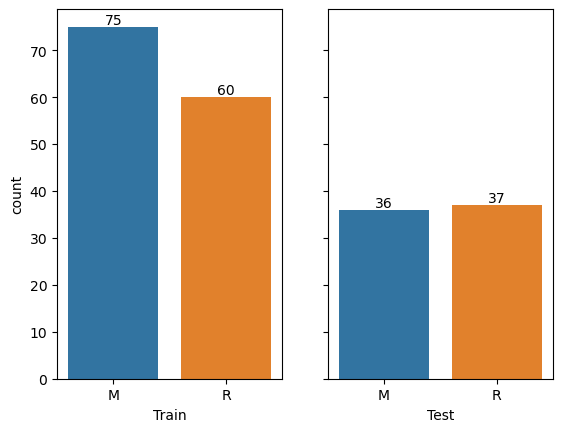

In [8]:
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True)

counts_train = y_train.value_counts()
counts_test = y_test.value_counts()

y_t = counts_test.sort_values(ascending=True)

ax1 = sns.countplot(x=y_train, ax=ax1)
ax1.bar_label(container=ax1.containers[0], labels=counts_train)
ax1.set_xlabel('Train')

ax2 = sns.countplot(x=y_test, ax=ax2)
ax2.bar_label(container=ax2.containers[0], labels=y_t)
ax2.set_xlabel('Test')
ax2.set_ylabel('')

plt.show()

### Visualizing missing data in the whole dataset

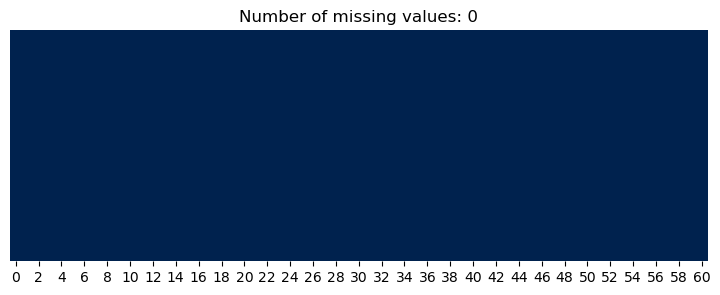

In [9]:
plt.figure(figsize=(9,3))
sns.heatmap(sonar.isnull(), yticklabels=False, cbar=False, cmap='cividis')
plt.title('Number of missing values: ' + str(sonar.isnull().sum().sum()))
plt.show()

### <font color='green'>Comment:</font> Counting the feature values in both, train and test sets makes clear that there are not missing values. To confirm, the function 'is null' in combination with a heatmap is used to visually pinpoint missing data. To conclude, no data is missing in the whole dataset. Regarding the categorical variables, the test set is well balanced, whereas in the train set there are more counts for one variable (M).

## D) Correlation <a id='correlation'></a>

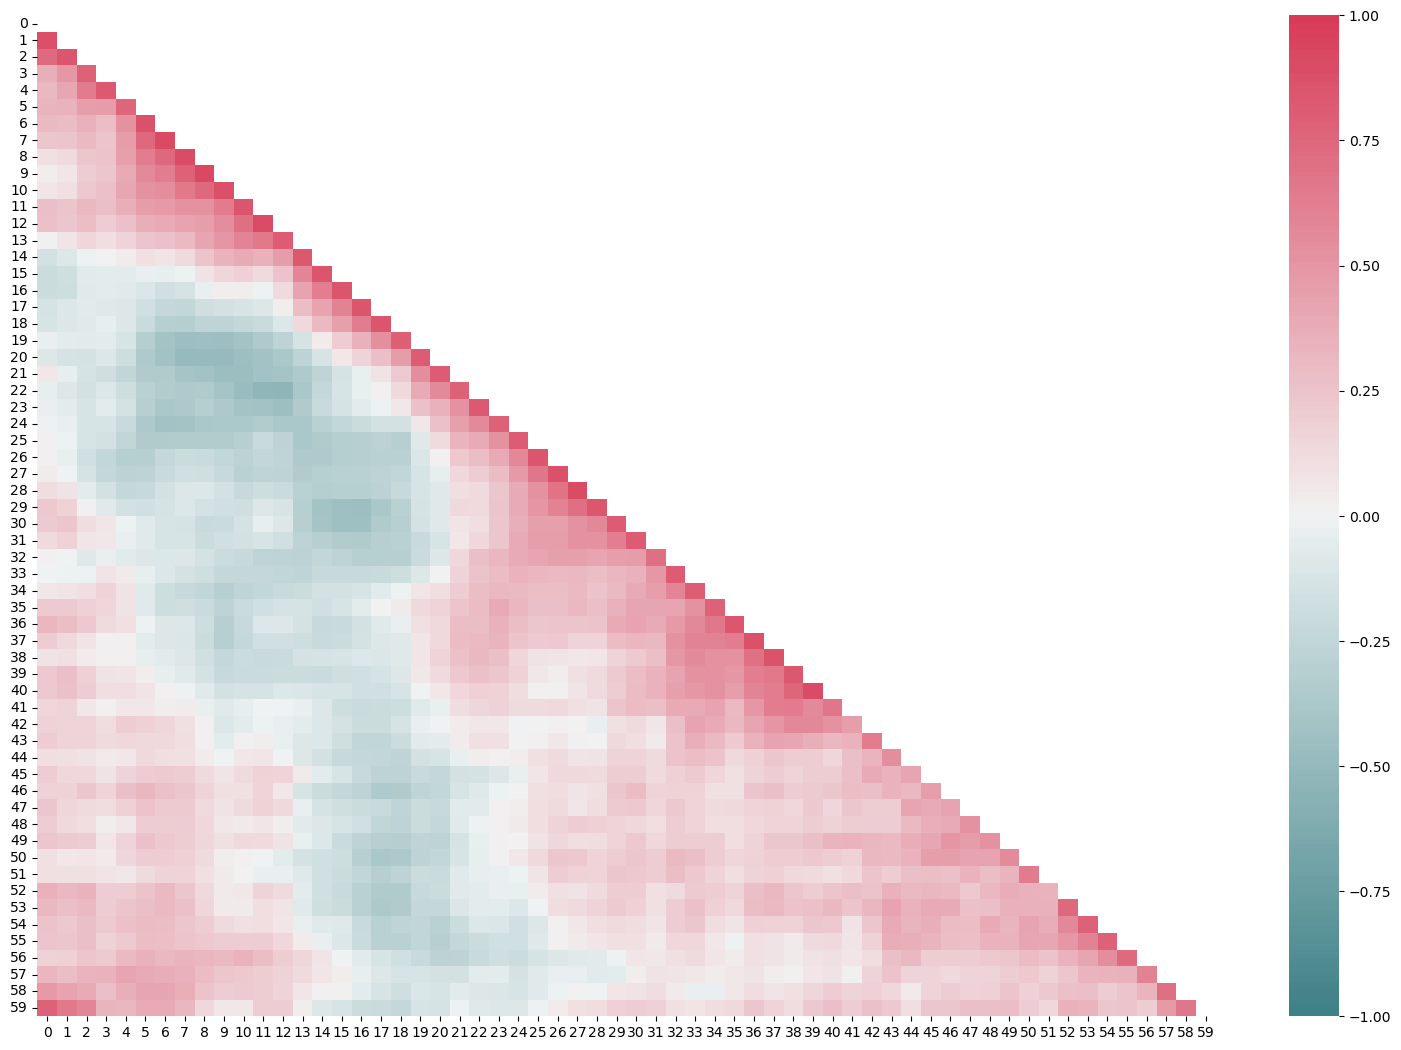

In [10]:
plt.figure(figsize = (19,13))

corr = features.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(200, 6, n=200), mask=matrix)

### <font color='green'>Comment:</font> A triangle correlation heatmap enables to quickly visualize patterns that otherwise would be difficult to see numerically while avoiding redundant information. Interestingly there is almost perfect positive correlation between pairs of neighboring features, representing high multicollinearity. It is also noticeable the patch of inverse relationships. While interpretations cannot be directly inferred, the correlation matrix serves as a powerful tool in exploratory data analysis.

## E) Error function <a id='error'></a>

### <font color='green'>Comment:</font> A confusion matrix can be used to illustrate the performance of a classification problem based on true-positives (TP), false-positives (FP), true-negatives (TN) and false-negatives (FN). Thus, these metrics can be utilized:

+ Accuracy (correct predictions over all predictions): <b>TP+TN/TP+FP+FN+TN</b>
+ Precision (correct positive predictions over all predicted positive observations): <b>TP/TP+FP</b>
+ Recall: (correct positive prdictions over all (actual) positives in the data): <b>TP/TP+FN </b>
+ F1 Score =  <b>2*(Recall * Precision) / (Recall + Precision)</b>

### Several evaluation criteria should be used to get a clearer understanding of the performance. For instance, Precision is a good measure to determine when the costs of FP is high, so we can answer the question: what proportion of positive predictions was actually correct? On the other hand, Recall attempts to answer what proportion of actual positives was predicted correctly. However, for the purpose of this assignment I will use the F1 score since I have an uneven class distribution in the training set.

## F) Data normalization <a id='normal'></a>

### <font color='green'>Comment:</font> Data should be normalized in cases where there is no common scale. In this dataset, all the values fall between 0 and 1, so normalization is not needed. 

***

# 3. Logistic regression with Lasso penalization. <a id='chapter2'></a>

***

+ A) Parameter definition for the LogisticRegression class (<font color='green'>comment</font>)
+ B) Create a LogisticRegression model regularised by Lasso (<font color='red'>code</font>)
+ C) Fit logistic regression model and performance on training and testing sets (<font color='red'>code</font> and <font color='green'>comment</font>)
+ D) Most important hyperparameter (<font color='green'>comment</font>)
+ E) Cross-validation for hyperparameter tuning (<font color='red'>code</font> and <font color='green'>comment</font>)
+ F) Visualizing model parameters change as a function of the hyperparameter (<font color='red'>code</font> and <font color='green'>comment</font>)
+ G) Best possible model configuration (<font color='red'>code</font> and <font color='green'>comment</font>)

## A) Logistic Regression object

### <font color='green'>Comment:</font> Justification of parameters.

* `penalty = L1` because LASSO works by applying L1 penalty to the loss function.
* `dual = False` because is only for L2 penalty with liblinear solver.
* `tol = 0.0001` because setting a large number stops the algorithm before convergence, thus I have chosen the default.
* `C = 1` because it must be non-negative and > 0, to start, I have selected the default value.
* `fit_intercept = True` because I want to add the bias to the decision function.
* `intercept_scaling = False` because it is only useful when the solver is liblinear.
* `class_weight = None` because don't want to bias the model.
* `random_state = 1234` because the value was given by the instructions. 
* `solver='saga` because it "guarantes" fast convergence on features with approximately the same scale.
* `max_iter = 10000` because first I used 100 and did not converge, thus a higher number of iterations is preferred.
* `multi_class = 'auto` because the problem only has two class labels.
* `verbose = 0` because don't need to see the values.
* `warm_start = False` because don't need to use a previous solution as an initialization.
* `n_jobs = None`, because dont't need parallelization.
* `l1_ratio = None` because only works for elastic net penalization. 

## B) Logistic Regression model regularised by Lasso

In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [12]:
logmodel = LogisticRegression(
    penalty='l1',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=False,
    class_weight=None,
    random_state=1234,
    solver='saga',
    max_iter=10000,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)

## C) Fit logmodel and performance on train and test sets

In [13]:
logmodel.fit(X_train,y_train)
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)
print('Perfomance on the train set: ' + str(f1_score(y_train, predictions_train, average='weighted')))
print('Perfomance on the test set: ' + str(f1_score(y_test, predictions_test, average='weighted')))

Perfomance on the train set: 0.8358824411455991
Perfomance on the test set: 0.7396282719145926


### <font color='green'>Comment:</font> The implemented Logistic Regression baseline model obtained a F1 score of 0.83 for the train set and 0.73 for the test set. As expected, the model performs better in the training set. The predictions were averaged to 'weighted' to account for class imbalance and compute a single score for both classes.

## D) Most important hyperparameter

### <font color='green'>Comment:</font> The most important hyperparameters is C, which  controls the amount of coefficient shrinkage. The larger the value of C the greater the amount of shrinkage. During the course, it was defined as lambda ($\lambda$).

## E) Cross-validation for hyperparameter tuning

In [14]:
logmodelCV = LogisticRegressionCV(
    Cs=10, 
    fit_intercept=True, 
    cv=10, 
    dual=False, 
    penalty='l1', 
    scoring=None, 
    solver='saga', 
    tol=0.0001, 
    max_iter=10000, 
    class_weight=None, 
    n_jobs=None, 
    verbose=0, 
    refit=True, 
    intercept_scaling=False, 
    multi_class='auto', 
    random_state=None, 
    l1_ratios=None)

logmodelCV
logmodelCV.fit(X_train,y_train)

LogisticRegressionCV(cv=10, intercept_scaling=False, max_iter=10000,
                     penalty='l1', solver='saga')

In [15]:
# Range of values in a logarithmic scale between 1e-4 and 1e4.

logmodelCV.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [16]:
print('Best lambda value after cross validation: ' + str(logmodelCV.C_[0]))

Best lambda value after cross validation: 2.782559402207126


### <font color='green'>Comment:</font> Cross validation tunes the hyperparameter C to select the best value. According to the documentation, if `Cs` is as an integer, a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4. For this case, I have tried with the default value 10 using 10 k-fold cross validations. 

## F) Visualizing model parameters change as a function of lambda

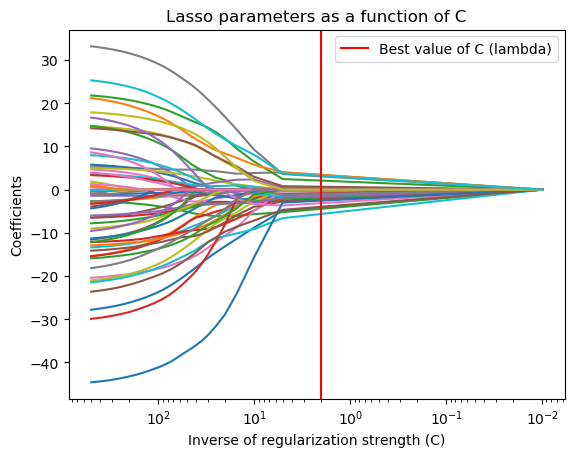

In [17]:
lambdas = np.linspace(0.01,500,100)
logmodel = LogisticRegression(penalty='l1',dual=False,tol=0.0001, solver='saga', max_iter=10000)
coefs = []

for l in lambdas:
    logmodel.set_params(C=l)
    logmodel.fit(X_train,y_train)
    coefs.append(logmodel.coef_[0])
    
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
ax.invert_xaxis()
plt.axvline(x = int(logmodelCV.C_[0]), color = 'r', label = 'Best value of C (lambda)')
plt.xlabel('Inverse of regularization strength (C)')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Lasso parameters as a function of C')
plt.show()

### <font color='green'>Comment:</font> The plot above shows the LASSO regularization path. Meaning that, as the inverse of the regularization strength decreases, the parameters (coefficients) of the variables go to zero. This is the fundamental principle behind feature selection, so after the regularization, the features with non-zero coefficients should be considered.

## G) Train a model with the "best possible" configuration

In [42]:
log_lasso_opt = LogisticRegression(
    penalty='l1',
    dual=False,
    tol=0.0001,
    C=2.782559402207126,
    fit_intercept=True,
    intercept_scaling=False,
    class_weight=None,
    random_state=1234,
    solver='saga',
    max_iter=10000,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)

In [43]:
log_lasso_opt.fit(X_train,y_train)
predictions_train_log = log_lasso_opt.predict(X_train)
predictions_test_log = log_lasso_opt.predict(X_test)
train_log_opt = f1_score(y_train, predictions_train_log, average='weighted')
test_log_opt = f1_score(y_test, predictions_test_log, average='weighted')
print(f'Perfomance on the train set: {train_log_opt:.3f}')
print(f'Perfomance on the test set: {test_log_opt:.3f}')

Perfomance on the train set: 0.873
Perfomance on the test set: 0.767


In [44]:
X_test[0]

5      0.1761
66     0.1865
6      0.5598
196    0.0757
54     0.1030
        ...  
101    0.2361
61     0.2804
99     0.1052
134    0.0569
20     0.0576
Name: 0, Length: 73, dtype: float64

### <font color='green'>Comment:</font> The optimal model based on cross-validation is trained. This model should have a high generalisation ability, and as expected, scores higher than the baseline model.

# 4. Tree-based models <a id='chapter3'></a>

+ A) Baseline random forest model (<font color='red'>code</font> and <font color='green'>comment</font>)
+ B) Compute the OOB error (<font color='red'>code</font> and <font color='green'>comment</font>)
+ C) Suitable value of n_estimators based on the OOB error (<font color='red'>code</font> and <font color='green'>comment</font>)
+ D) Cross-validation (<font color='red'>code</font>)
+ E) Random forest with the tuned parameters (<font color='red'>code</font> and <font color='green'>comment</font>)
+ F) Most important features (<font color='red'>code</font> and <font color='green'>comment</font>)
+ G) Imagine  (<font color='green'>comment</font>)

In this section, you will train two random forests using the Scikit-Learn library.

a) First, construct a random forest named *`rf_1`*. More specifically, you will use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) class or the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) class. The constructor requires the definition of various hyperparameters. Read carefully the documentation and justify the values you will use for the hyperparameters (like in `question 2.a)`). What is the main hyperparameter other than `n_estimators` to tune?

**Expected answer**: code and comment

## A) Baseline Random Forest model

### <font color='green'>Comment:</font> Justification of parameters.

* `n_estimators = 100` to establish a baseline model. 
* `criterion = gini:` because Gini impurity is more efficient than entropy in terms of computing power.
* `max_depth = None` So the nodes are expanded until all leaves are pure.
* `min_samples_split = 2` So 2 samples are the mimimum required to split an internal node.
* `min_samples_leaf = 1` So one sample is the minimum to be at a leaf node.
* `min_weight_fraction_leaf = 0.0` becasue don't want to bias the model with higher weights.
* `max_features = 'sqrt'` so the number of features to consider for splitting a node are *sqrt(n_features) = 10*.
* `max_leaf_nodes = None` so unlimited number of leaf nodes grow.
* `min_impurity_decrease = 0.0` because a node will be split if the impurity is greater than or equal to 0.
* `bootstrap = True` because bootstrap samples for building trees allow to compute the oob score.
* `oob_score = True` to get an estimate of the generalization score.
* `n_jobs = None` because dont't need parallelization.
* `random_state = None` because the value was given by the instructions.
* `verbose = 0` because I dont need to print the details.
* `warm_start = False` so the mode starts from scratch.
* `class_weight=None` although there is a small class imbalance, I dont want to bias the model.
* `ccp_alpha = 0.0`, because I haven't run *cost_complexity_pruning_path* for selecting the best value, so I use the default.
* `max_samples = None` so X_train.shape[0] is the max number of samples that can be considered.

### The main parameter to tune appart from n_estimators is max_features

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
rf_1 = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=None, 
    random_state=1234, 
    verbose=0, 
    warm_start=True, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

In [30]:
rf_1.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=1234, warm_start=True)

In [31]:
predictions_train_rf_1 = rf_1.predict(X_train)
predictions_test_rf_1 = rf_1.predict(X_test)
train_score = f1_score(y_train, predictions_train_rf_1, average='weighted')
test_score = f1_score(y_test, predictions_test_rf_1, average='weighted')
print(f'Perfomance on the train set: {train_score:.3f}')
print(f'Perfomance on the test set: {test_score:.3f}')

Perfomance on the train set: 1.000
Perfomance on the test set: 0.781


## B) Compute the OOB error

In [32]:
print(f'OOB error: {(1 - rf_1.oob_score_):.3f}')

OOB error: 0.185


### <font color='green'>Comment:</font> The OOB score represents the number of correct predictions from the out-of-bag sample (accuracy). The error is simply 1 - accuracy, and represents the prediction error of the Random Forest model using bootstrapping. 

## C) Suitable value of n_estimators based on the OOB error

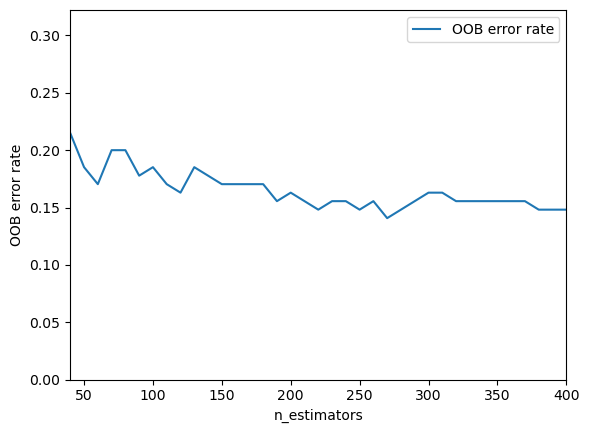

In [33]:
error_rate = []

min_estimators = 40
max_estimators = 400
step=10

for i in range(min_estimators, max_estimators+1, step):
    rf = RandomForestClassifier(warm_start=True, n_estimators=i, max_features='sqrt',random_state=1234, oob_score=True)
    rf.fit(X_train,y_train)
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)
    

plt.plot(range(min_estimators, max_estimators +1, step), error_rate, label='OOB error rate')
plt.ylim(0, 1.5*max(error_rate)) 
plt.xlim(min_estimators, max_estimators)
plt.xlabel('n_estimators')
plt.ylabel('OOB error rate')
plt.legend()
plt.show()

### <font color='green'>Comment:</font> The suitable number of n_estimators can be determined based on the stabilization of the OOB error. For instance, in this example and by visual interpretation, seems that 250 n_estimators should be considered.

## D) Cross-validation

In [34]:
 param_grid = {'n_estimators': [int(x) for x in np.linspace(50,400,8)],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 2, 8],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'bootstrap': [True],
        'oob_score': [False,True],
        'random_state':[1234],
        }

<div class="alert alert-block alert-warning"><b>Warning! Running Grid Search Cross Validation can take some time </b>  </div>

In [35]:
rf_Model = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=1, n_jobs = -1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400],
                         'oob_score': [False, True], 'random_state': [1234]},
             verbose=1)

In [36]:
# Best parameters

rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 350,
 'oob_score': False,
 'random_state': 1234}

## E) Random forest with tuned parameters

In [37]:
rf_opt = RandomForestClassifier(
    n_estimators=350,
    criterion='gini', 
    max_depth=8, 
    min_samples_split=2, 
    min_samples_leaf=1,  
    max_features='log2', 
    bootstrap=True, 
    oob_score=False, 
    random_state=1234)

rf_opt.fit(X_train, y_train)

predictions_train_rf_opt = rf_opt.predict(X_train)
predictions_test_rf_opt = rf_opt.predict(X_test)
train_score_opt = f1_score(y_train, predictions_train_rf_opt, average='weighted')
test_score_opt = f1_score(y_test, predictions_test_rf_opt, average='weighted')
print(f'Performance on the train set: {train_score_opt:.3f}')
print(f'Performance on the test set: {test_score_opt:.3f}')

Performance on the train set: 1.000
Performance on the test set: 0.795


### <font color='green'>Comment:</font> Although the performance of the most suitable configuration did not increase significatively, this model outperforms the baseline and is therefore selected as the optimal one.

## F) Most important features

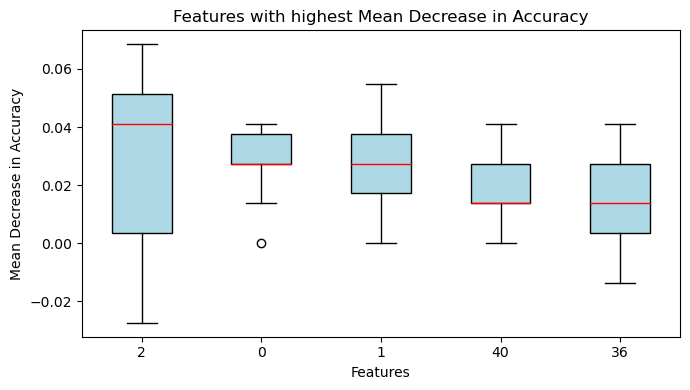

In [39]:
importance = permutation_importance(rf_opt, X_test, y_test, n_repeats=10, random_state=1234, n_jobs=2)
sort = importance.importances_mean.argsort()
invert_sort=sort[::-1][:5]

fig, ax = plt.subplots(figsize=(7,4))
box = ax.boxplot(importance.importances[invert_sort].T, vert=True, patch_artist=True, labels=X_test.columns[invert_sort])
ax.set_title('Features with highest Mean Decrease in Accuracy')
ax.set_xlabel('Features')
ax.set_ylabel('Mean Decrease in Accuracy')
fig.tight_layout()

for i in box['boxes']:
    i.set_facecolor('lightblue')

for median in box['medians']:
    median.set_color('red')

plt.show()

### <font color='green'>Comment:</font> This boxplot is relevant for feature selection. It shows the importance of the variables for classification. The higher the value in the Mean Decrease Accuracy plot, the higher the importance of the feature. In other words, by leaving out these features, the model losses accuracy thus becoming less skillfull at classifying the data. 

## G) Imagine - steps for a new RF model

### <font color='green'>Comment:</font> The steps could be

- Step 1 "*Problem definition*": Define the purpose of the model (regression vs classification)
- Step 2 "*Rethink if a subset model is worth it*": Define why decreasing the number of features is important.
- Step 3 "*Create a subset dataset with the most important features*"
- Step 4 "*Split it into train and test sets*"
- Step 5 "*Create a new random forest classifier*"
- Step 6 "*Train the new classifier using the train set*"
- Step 7 "*Apply the classifier to the test set*"
- Step 8 "*Compare the accuracy of the full dataset vs subset dataset*"

## 5. Model comparison <a id='chapter4'></a>

+ A) Confusion Matrix (<font color='red'>code</font> and <font color='green'>comment</font>)
+ B) Compare perfomance (<font color='red'>code</font> and <font color='green'>comment</font>)
+ C) Compare features (<font color='red'>code</font> and <font color='green'>comment</font>)
+ D) Select a model (<font color='green'>comment</font>)
+ E) Further work (<font color='green'>comment</font>)

## A) Confusion Matrix

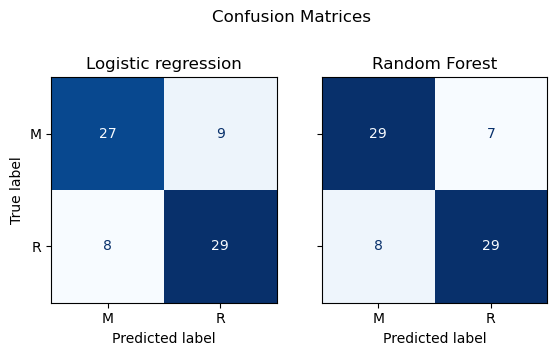

In [45]:
cm_log = confusion_matrix(y_test, predictions_test_log, labels=log_lasso_opt.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_lasso_opt.classes_)

cm_rf = confusion_matrix(y_test, predictions_test_rf_opt, labels=rf_opt.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf_opt.classes_)


fig,[ax1,ax2] = plt.subplots(1,2, sharey=True)

fig.suptitle('Confusion Matrices', fontsize=12)
fig.subplots_adjust(top=1.1)

disp_log.plot(ax=ax1, colorbar=False, cmap='Blues')
ax1.set_title('Logistic regression')


disp_rf.plot(ax=ax2, colorbar=False, cmap='Blues')
ax2.set_title('Random Forest')
ax2.set_ylabel('')
plt.show()

### <font color='green'>Comment:</font> The confusion matrix represents the accuracy of the classification algorithms, where:

+ True Negative (top-left quadrant)
+ False Positive (top-right quadrant)
+ False Negative (bottom-left quadrant)
+ True Positive (bottom-right quadrant)

### Both, Logistic Regression and Random Forest correctly predicted the rock category 29 times (True positive). The difference however is that Random Forest had less errors in misclassifying the mines (metal) accounting for 7 False positives vs 9 by Logistic Regression.

## B) Compare perfomance

In [46]:
print(f'Performance of Random Forest on the train set: {train_score_opt:.3f}')
print(f'Performance of Random Forest on the test set: {test_score_opt:.3f}')
print(' ')
print(f'Perfomance of Logistic Regression on the train set: {train_log_opt:.3f}')
print(f'Perfomance of Logistic Regression on the test set: {test_log_opt:.3f}')

Performance of Random Forest on the train set: 1.000
Performance of Random Forest on the test set: 0.795
 
Perfomance of Logistic Regression on the train set: 0.873
Perfomance of Logistic Regression on the test set: 0.767


### <font color='green'>Comment:</font> Comparing the performance of the models by means of the F1 score makes evident that Random Forest scores higher in both, the train and test sets.

## C) Compare features

In [47]:
importance_lasso = permutation_importance(log_lasso_opt, X_test, y_test, n_repeats=10, random_state=1234, n_jobs=2)
sort_lasso = importance_lasso.importances_mean.argsort()
invert_sort_lasso = sort_lasso[::-1][:5]
print('The 5 most important features according to Logistic Regression (LASSO) are: ' + str(invert_sort_lasso))

The 5 most important features according to Logistic Regression (LASSO) are: [ 2 11 36 13 27]


In [48]:
importance_rf = permutation_importance(rf_opt, X_test, y_test, n_repeats=10, random_state=1234, n_jobs=2)
sort_rf = importance_rf.importances_mean.argsort()
invert_sort_rf = sort_rf[::-1][:5]
print('The 5 most important features according to Random Forest are: ' + str(invert_sort_rf))

The 5 most important features according to Random Forest are: [ 2  0  1 40 36]


### <font color='green'>Comment:</font> At first look it seems that there is no noticeable difference among the importance of the features. However, through feature selection it has become evident the the predictor number 2 is the most important according to both models. Another predictor of high importance where the models agree is the number 36. 

## D) Select a model

### <font color='green'>Comment:</font> Although a more-in depth analysis is needed to reach a conclusion, for this particular problem and dataset I choose the Random Forest model. Seems that its ability to handle non-linearities in the data enables to obtain a higher score in the test set.

## F) Further work

### <font color='green'>Comment:</font> For Logistic Regression:

+ Test a more in-depth grid search instead of simply performing cross validation for identifying the optimal lambda value
+ Compare the performance of the models using Ridge and Elastic Net regularizations
+ Implement logistic regression with SDG optimization
+ Logistic regression vs perceptron

### <font color='green'>Comment:</font> For Random Forest:

+ Random Forest vs XGBoost
